In [2]:
import processing
import ds
import ml
import model_saving

/home/octo/anaconda2/envs/carnd-term1/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [53]:
filename = '/home/octo/Dropbox'+ '/SPY29Dec.csv'

In [54]:
data=processing.get_csv_pd(filename)
data=processing.BA(data)
data=processing.preprocessing(data)
data_km=ml.kalman_ma(data)
data['km']=data_km

In [55]:
import numpy as np
data['diff']=np.where(np.logical_and(data.Open>data.km,data.spread>0),data.vwap-data.km,np.where(np.logical_and(data.Open<data.km,data.spread<0),data.vwap-data.km,0))

In [56]:
data.tail()

,askPrice,askSize,bidPrice,bidSize,Open,Close,High,Low,Volume,vwap,change,liq,spread,vel,return,km,diff
2017-12-31 07:37:42.198573,266.0,59.0,265.98999,5.0,265.994995,265.994995,266.0,265.98999,64.0,265.999207,0.0,0.01001,-0.004211,-0.065002,0.000038,265.997400,0.001806
2017-12-31 07:37:45.649633,266.0,58.0,265.98999,5.0,265.994995,265.994995,266.0,265.98999,63.0,265.999207,0.0,0.01001,-0.004211,-0.054993,0.000038,265.997171,0.002035
2017-12-31 07:37:49.946201,266.0,55.0,265.98999,5.0,265.994995,265.994995,266.0,265.98999,60.0,265.999176,0.0,0.01001,-0.004181,-0.054993,0.000038,265.996964,0.002212
2017-12-31 07:37:52.921372,266.0,55.0,265.98999,1.0,265.994995,265.994995,266.0,265.98999,56.0,265.999817,0.0,0.01001,-0.004822,-0.049988,0.000038,265.996777,0.003040
2017-12-31 07:37:56.170620,266.0,50.0,265.98999,1.0,265.994995,265.994995,266.0,265.98999,51.0,265.999817,0.0,0.01001,-0.004822,-0.049988,0.000038,265.996607,0.003209


In [28]:
data.km.tail()

2017-12-31 07:37:42.198573    265.997400
2017-12-31 07:37:45.649633    265.997171
2017-12-31 07:37:49.946201    265.996964
2017-12-31 07:37:52.921372    265.996777
2017-12-31 07:37:56.170620    265.996607
Name: km, dtype: float64

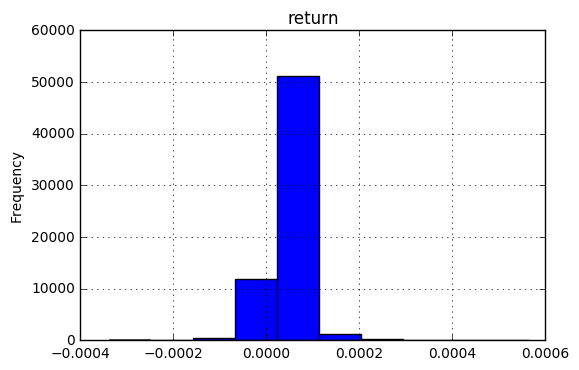

In [5]:
import matplotlib.pyplot as plt
data['return'].plot(kind='hist', grid=True, title='return')
plt.show()

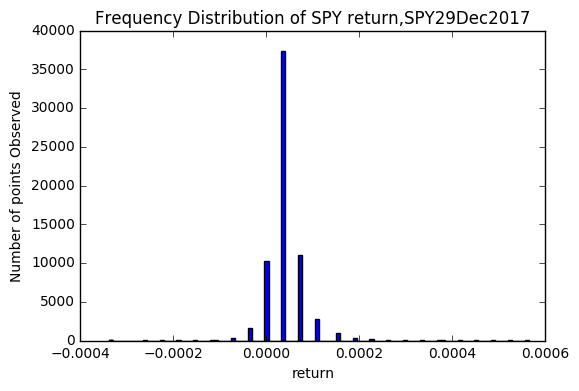

In [6]:
# This is the library most commonly used for plotting in Python.
# Notice how we import it 'as' plt, this enables us to type plt
# rather than the full string every time.
import matplotlib.pyplot as plt
# Plot a histogram using 20 bins
plt.hist(data['return'], bins=100)
plt.xlabel('return')
plt.ylabel('Number of points Observed')
plt.title('Frequency Distribution of SPY return,SPY29Dec2017');
plt.show()

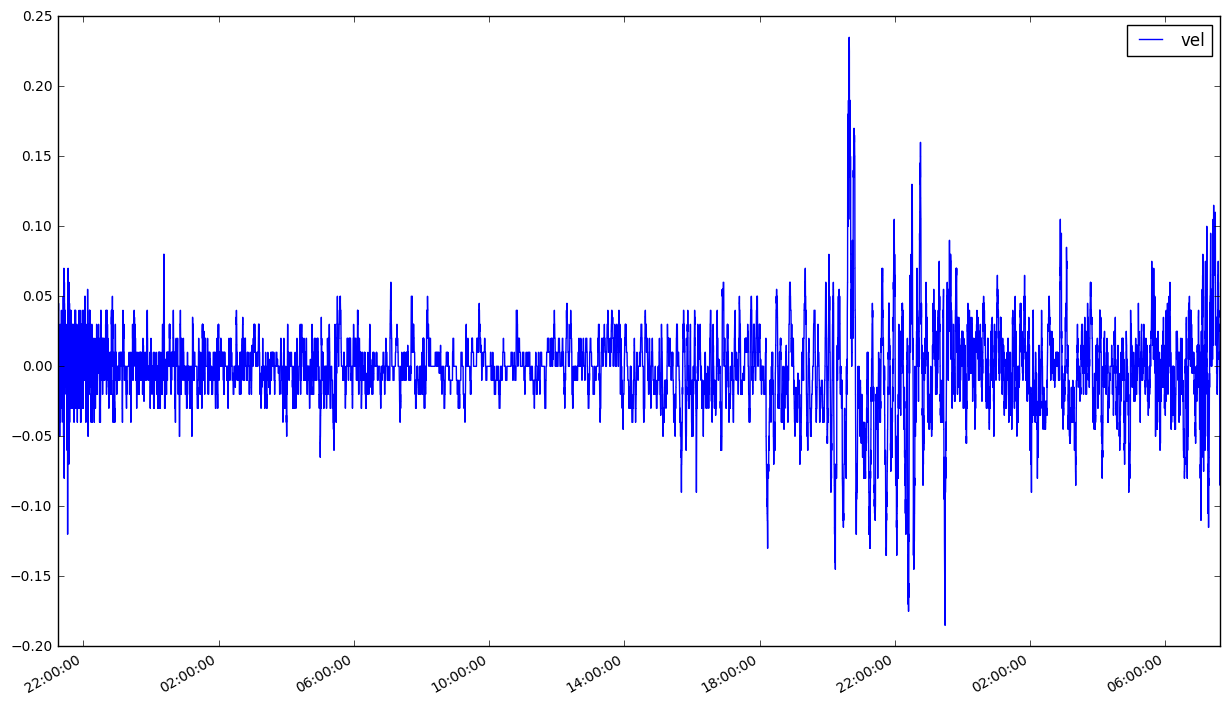

In [7]:
data[['vel']].plot(figsize=(15,9))
plt.show()

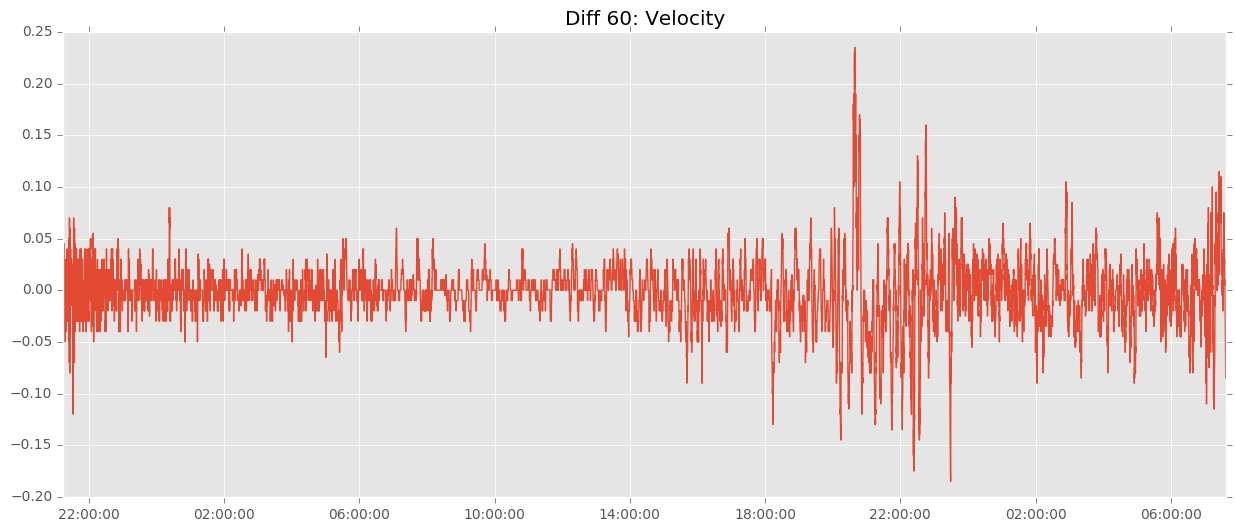

In [8]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use('ggplot')
plt.plot(data.vel)
plt.title('Diff 60: Velocity')
plt.show()

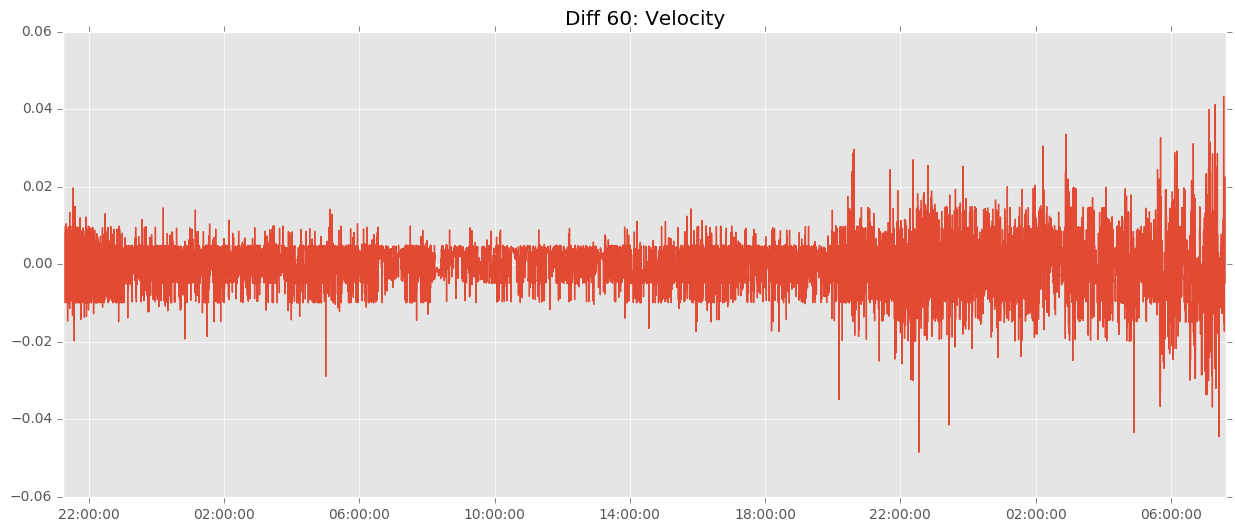

In [9]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use('ggplot')
plt.plot(data.spread)
plt.title('Diff 60: Velocity')
plt.show()

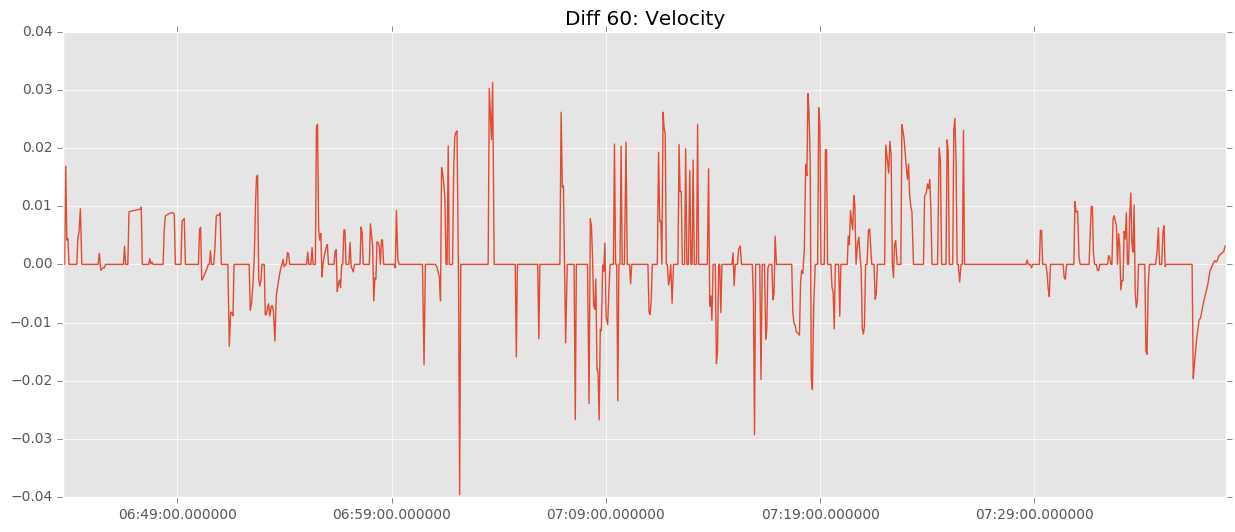

In [57]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
plt.style.use('ggplot')
plt.plot(data['diff'].tail(1000))
plt.title('Diff 60: Velocity')
plt.show()

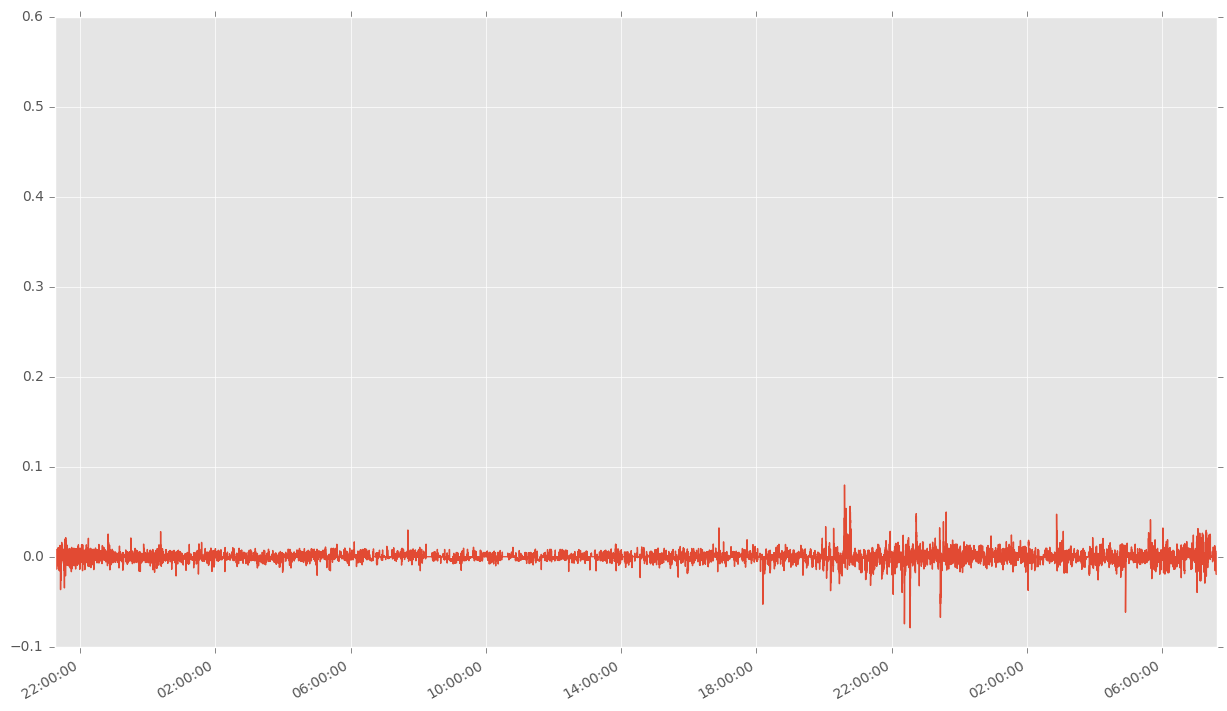

In [60]:
data['diff'].plot(figsize=(15,9))
plt.show()

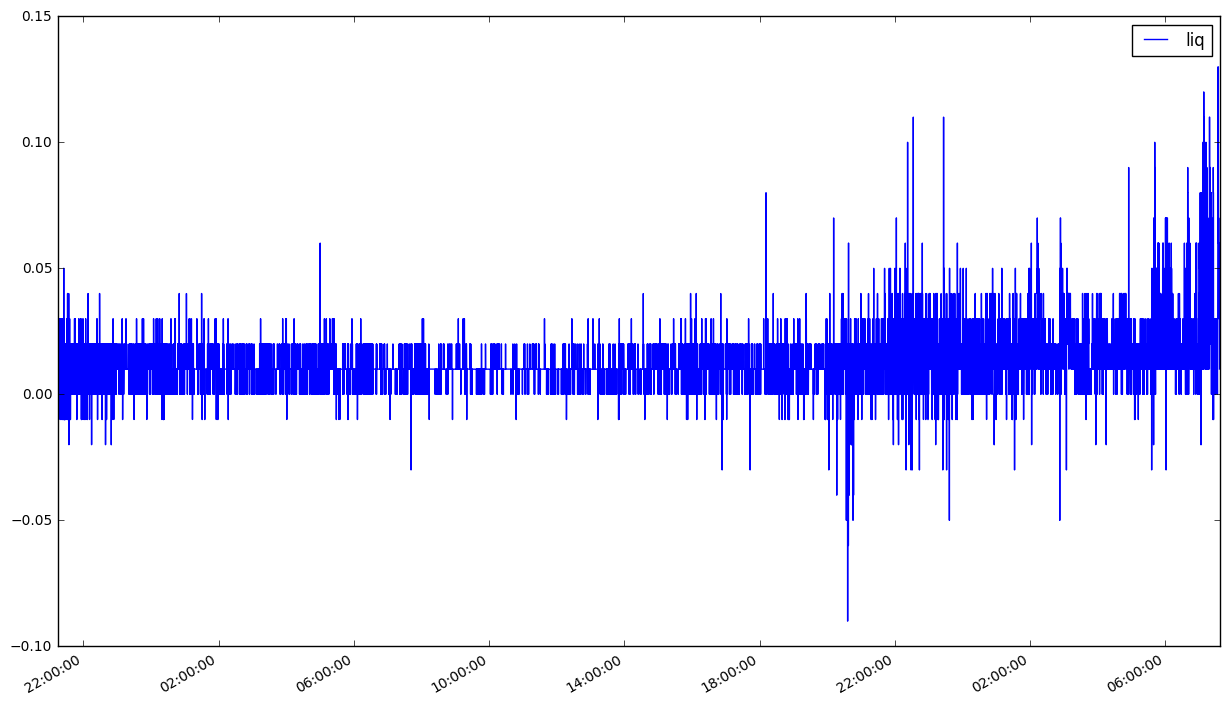

In [9]:
data[['liq']].plot(figsize=(15,9))
plt.show()

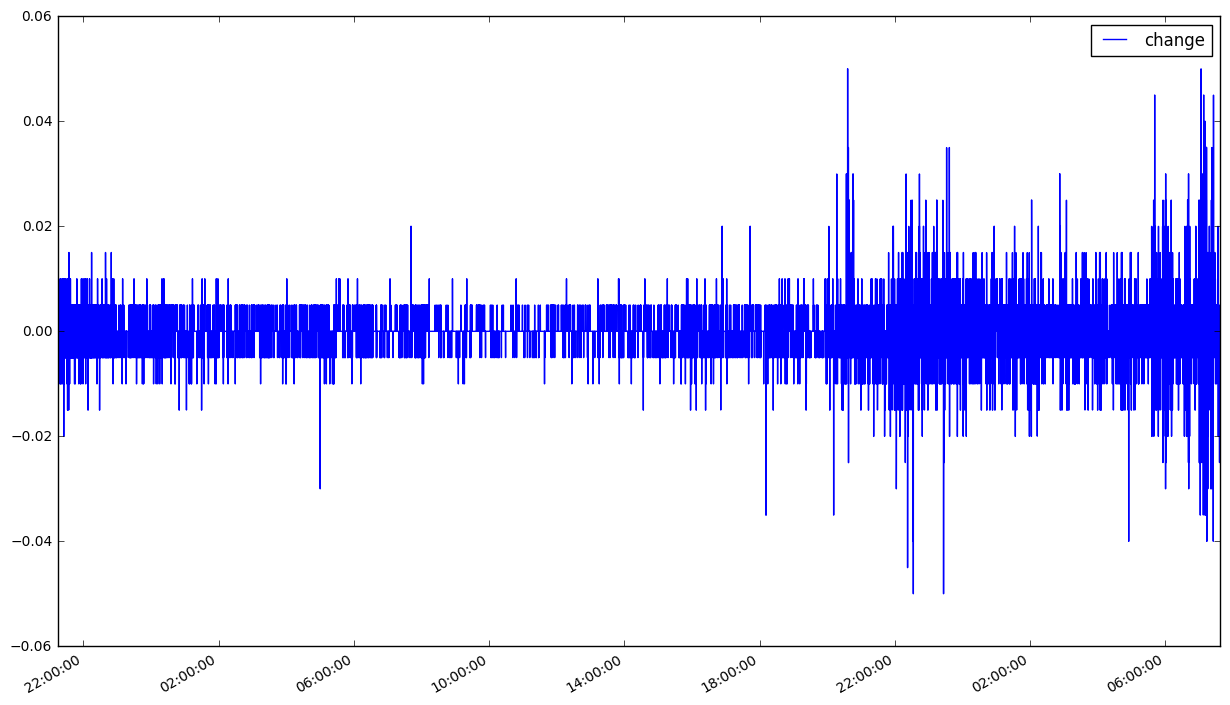

In [10]:
data[['change']].plot(figsize=(15,9))
plt.show()

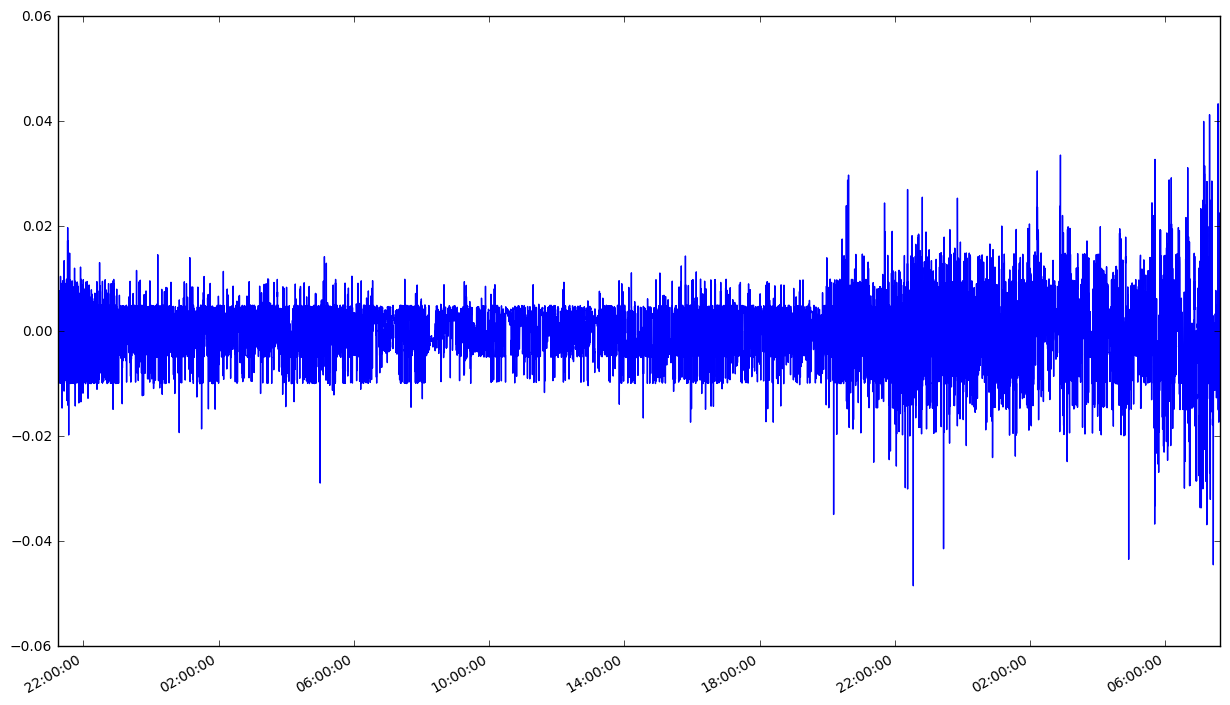

In [11]:
data['spread'].plot(figsize=(15,9))
plt.show()

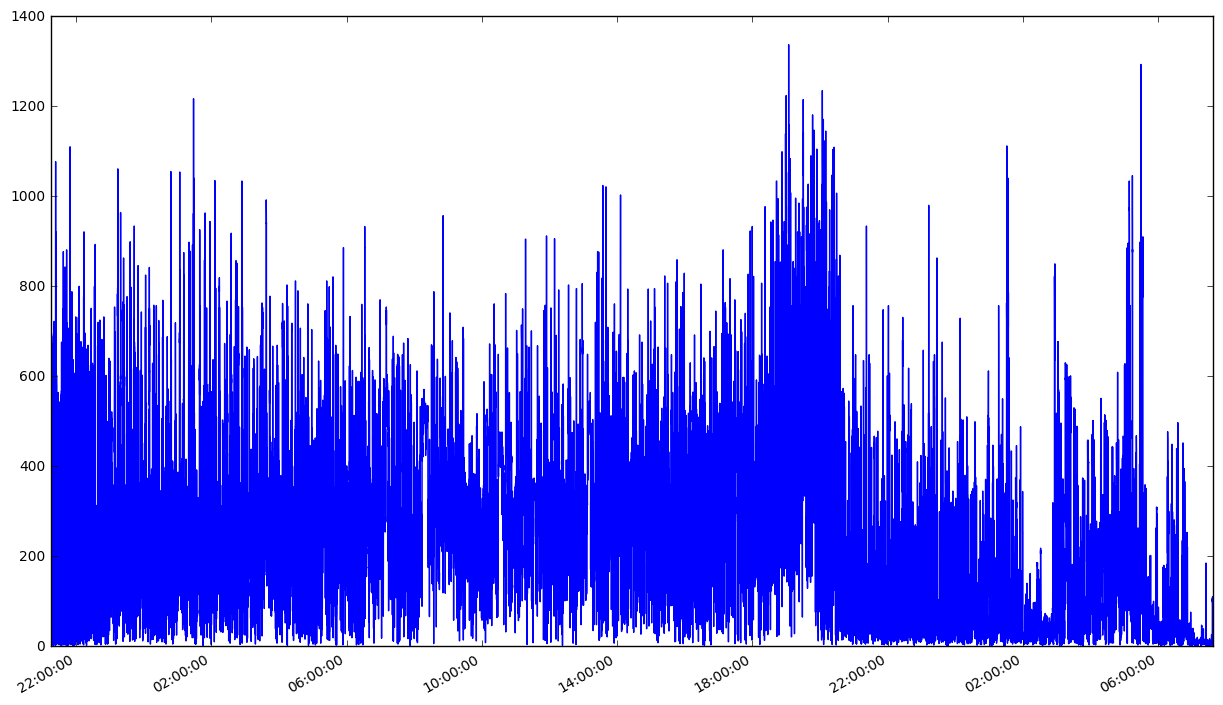

In [12]:
data['Volume'].plot(figsize=(15,9))
plt.show()

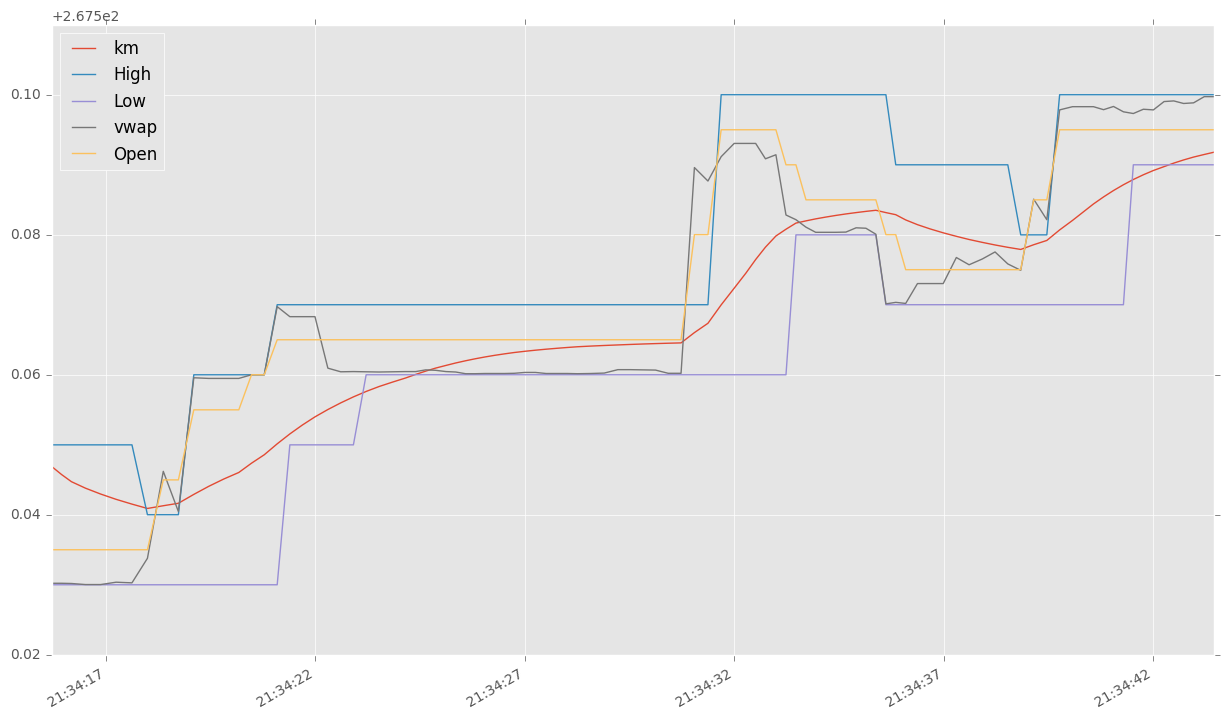

In [35]:
data[['km','High','Low','vwap','Open']][4000:4100].plot(figsize=(15,9))
plt.show()

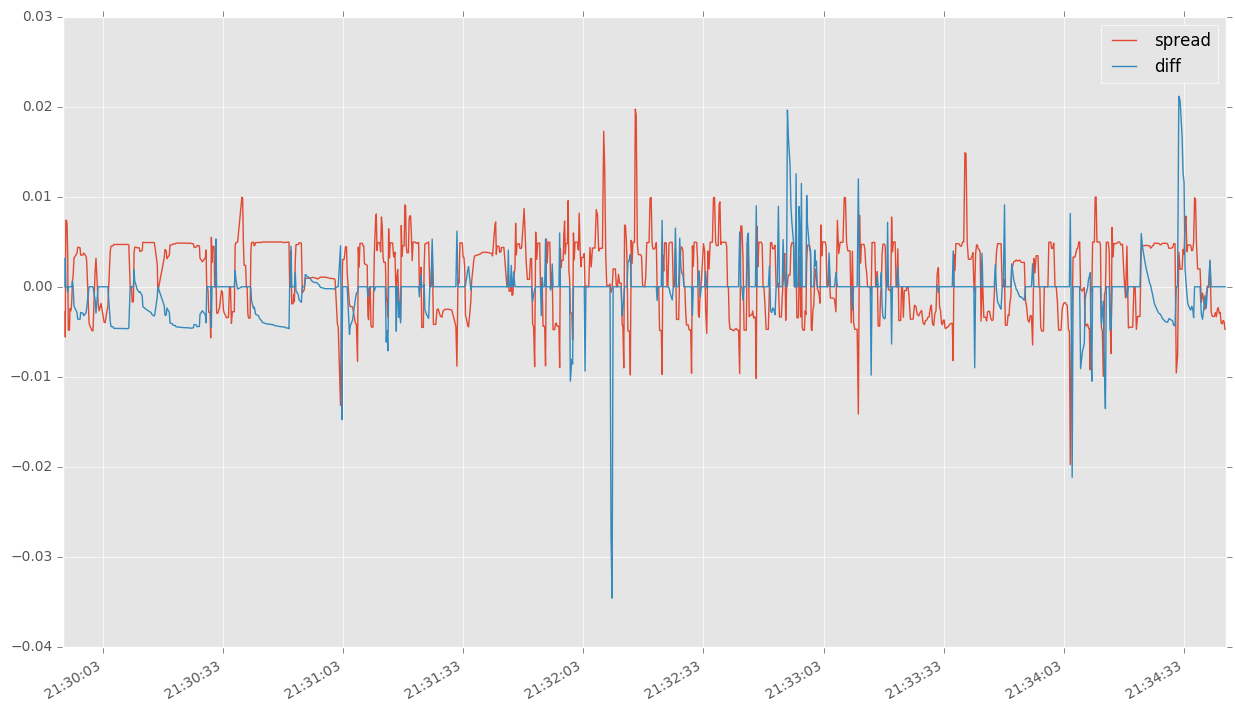

In [62]:
data[['spread','diff']][3000:4100].plot(figsize=(15,9))
plt.show()

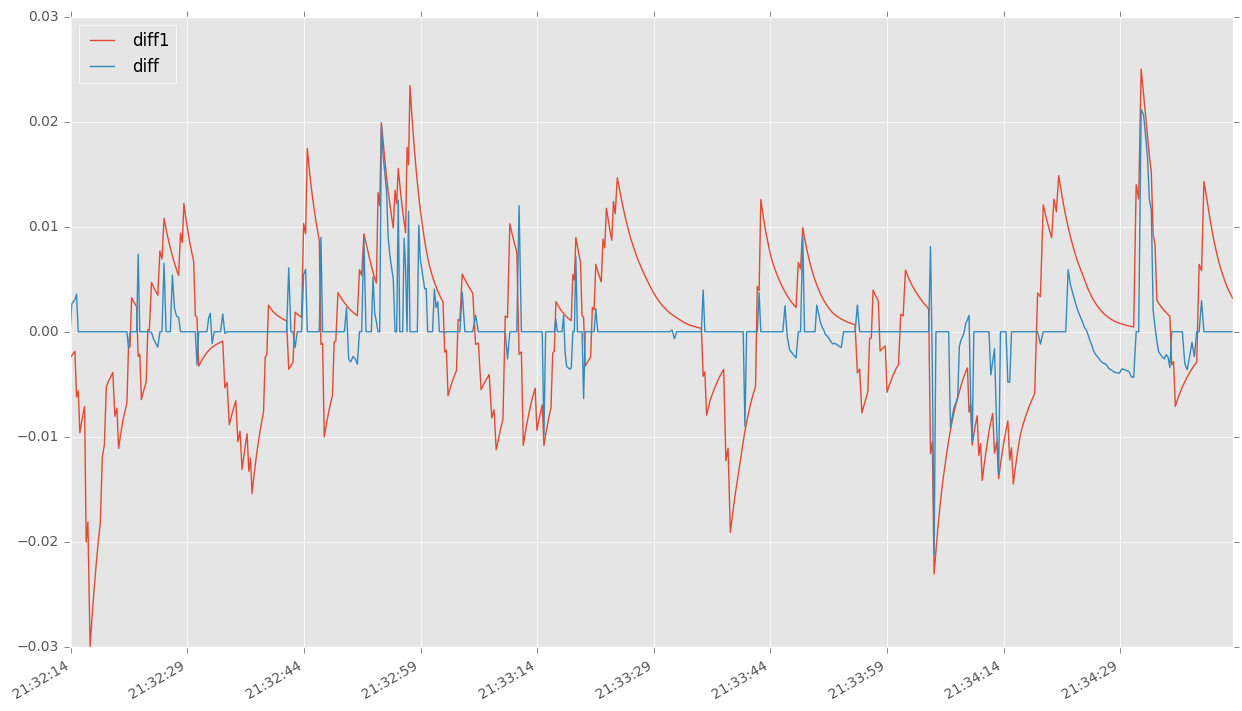

In [64]:
data['diff1']=data.Open-data.km
data[['diff1','diff']][3500:4100].plot(figsize=(15,9))
plt.show()

In [26]:
print(data.describe())

           askPrice       askSize      bidPrice       bidSize          Open  \
count  65364.000000  65364.000000  65364.000000  65364.000000  65364.000000   
mean     267.244720    123.562462    267.228333    141.263901    267.229614   
std        0.554876    136.523666      0.558859    142.724884      0.557722   
min      265.779999      1.000000    265.769989      1.000000    265.774994   
25%      267.299988     19.000000    267.290009     21.000000    267.294983   
50%      267.540009     60.000000    267.529999     84.000000    267.535004   
75%      267.670013    221.000000    267.660004    243.000000    267.665009   
max      267.869995    982.000000    267.859985   1146.000000    267.864990   

              Close          High           Low        Volume          vwap  \
count  65364.000000  65364.000000  65364.000000  65364.000000  65364.000000   
mean     267.229645    267.313129    267.295142    264.826263    267.229553   
std        0.557710      0.548987      0.556095    

In [69]:
import numpy as np 
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot

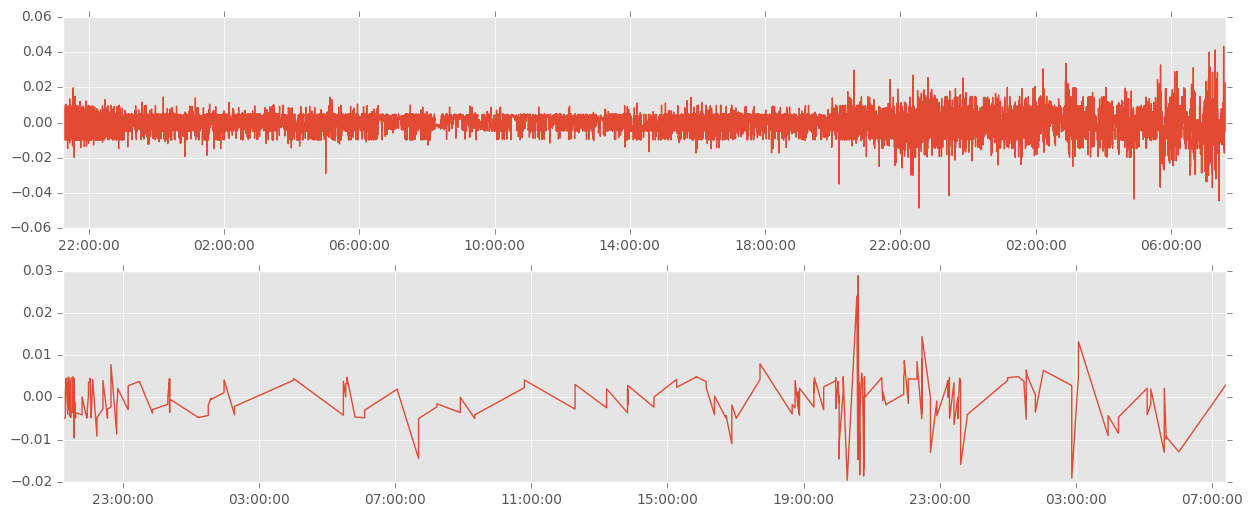

In [70]:
groups = data.spread.groupby(np.where(data.Open>data.High,1,0)+np.where(data.Open<data.Low,-1,0))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
	pyplot.subplot((n_groups*100) + 10 + i)
	i += 1
	pyplot.plot(group)
pyplot.show()

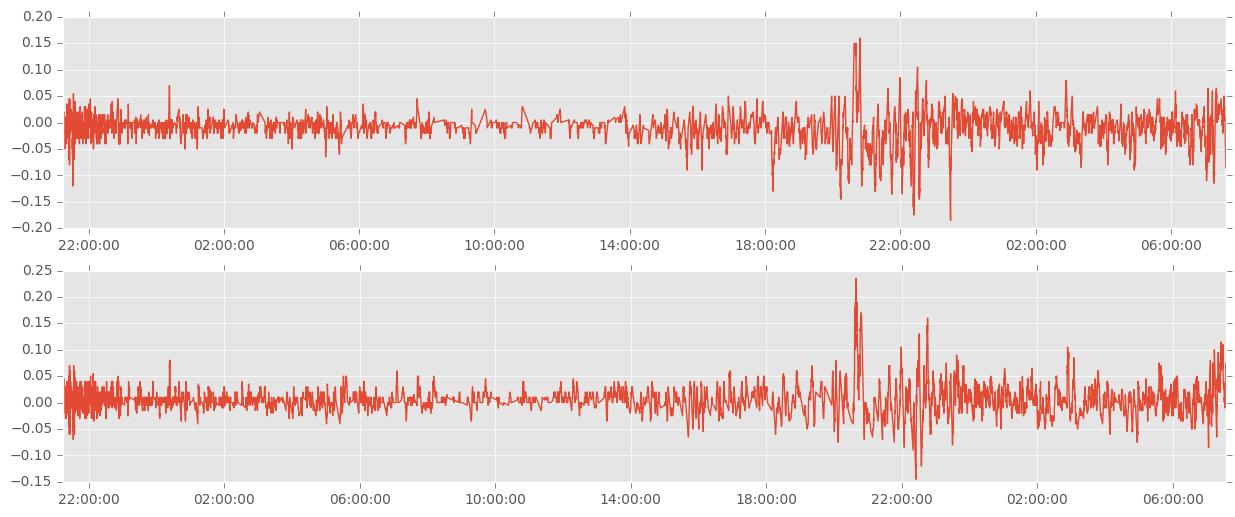

In [71]:
groups = data.vel.groupby(np.where(data.Open>data.km,1,0)+np.where(data.Open<data.km,-1,0))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
	pyplot.subplot((n_groups*100) + 10 + i)
	i += 1
	pyplot.plot(group)
pyplot.show()

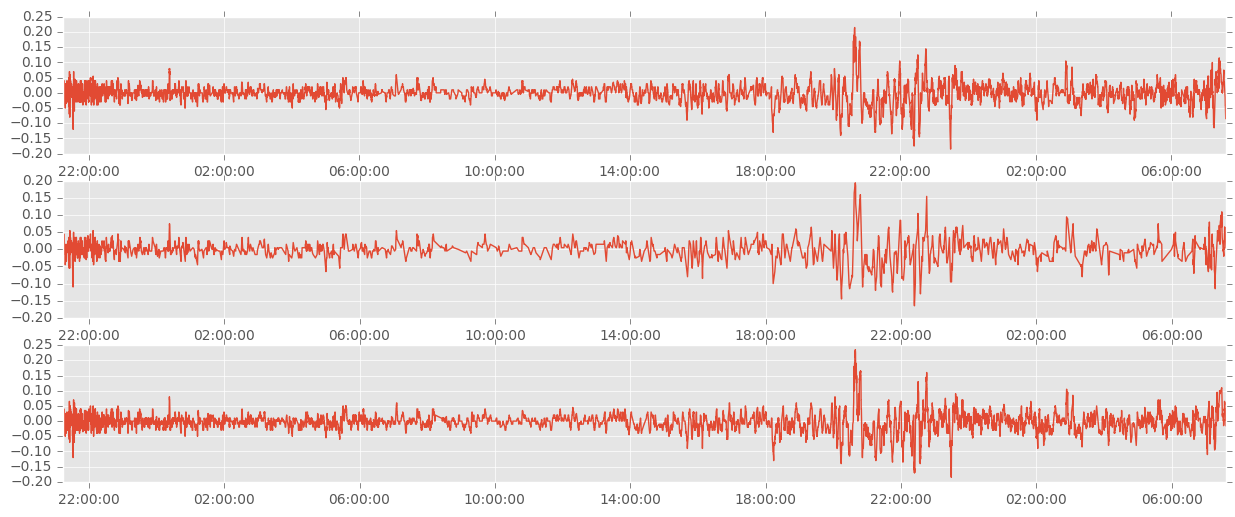

In [72]:
groups = data.vel.groupby(np.where(data.spread>0,1,0)+np.where(data.spread<0,-1,0))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
	pyplot.subplot((n_groups*100) + 10 + i)
	i += 1
	pyplot.plot(group)
pyplot.show()

#### BOX and WHISKER plot

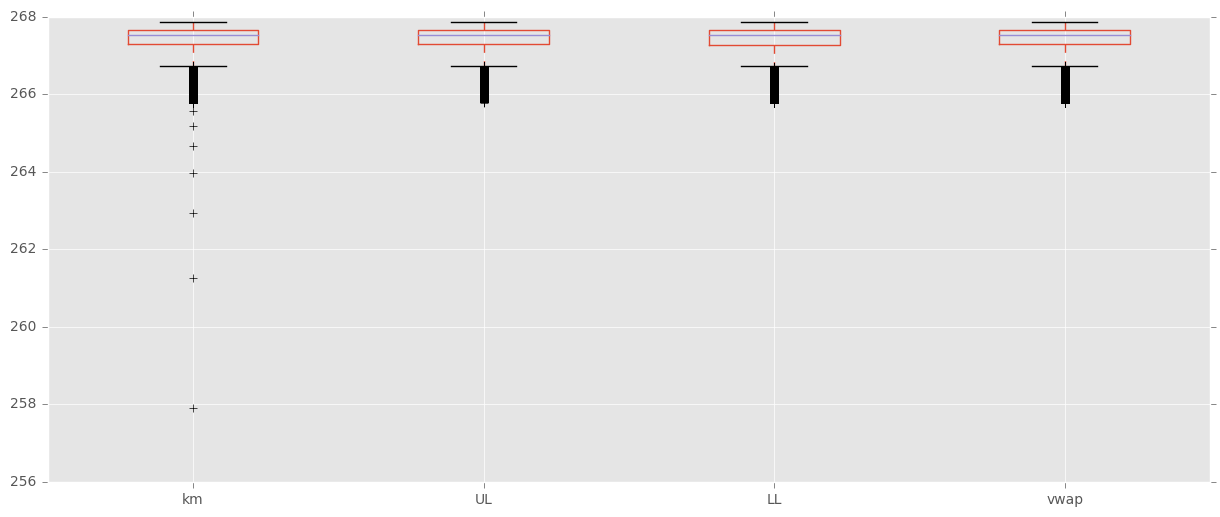

In [39]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper
from matplotlib import pyplot

data[['km','UL','LL','vwap']].boxplot()
pyplot.show()

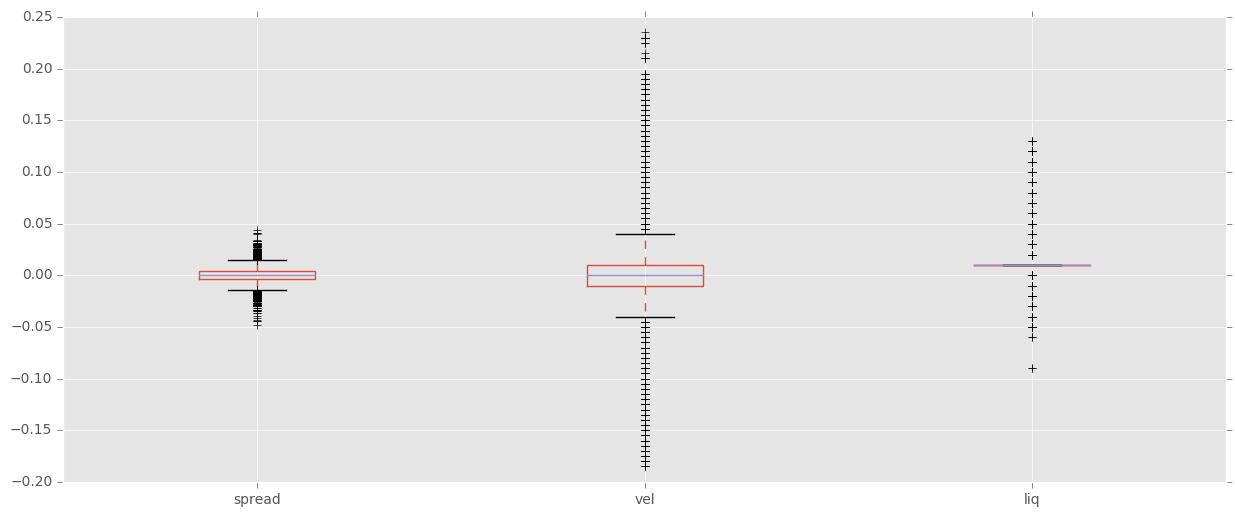

In [41]:
data[['spread','vel','liq']].boxplot()
pyplot.show()

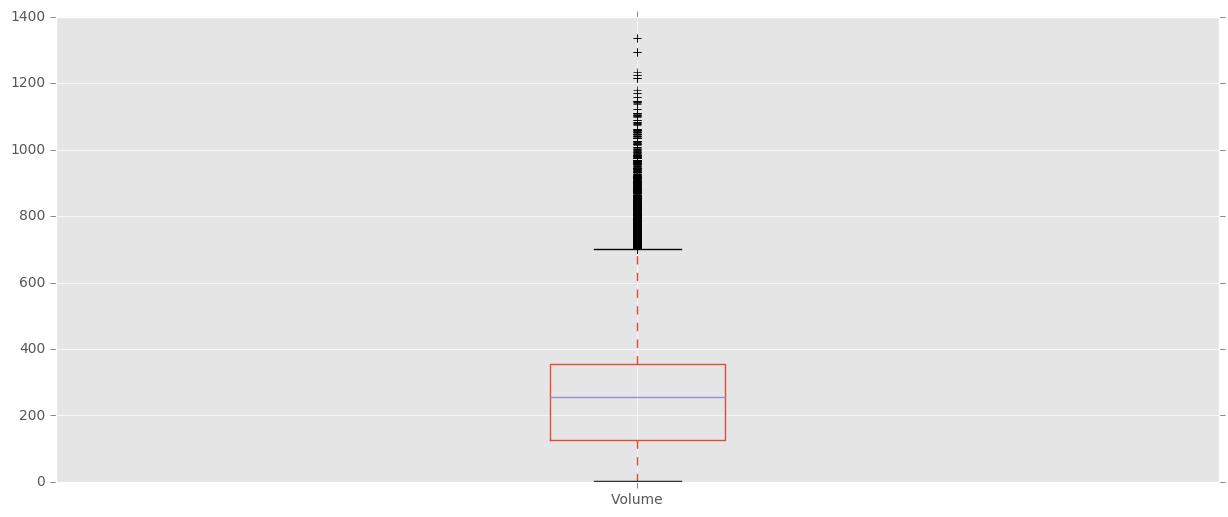

In [42]:
data[['Volume']].boxplot()
pyplot.show()